
#### Analysis of Churn data


In [115]:
# Import dos pacotes que serão utilizados
import pandas as pd
import seaborn as sns
import statistics as sts


#### Obtenção dos dados

Os dados foram obtidos do curso de Ciência de dados do prof Fernando Amaral.  

Os dados são referentes à Churn Analysis de uma empresa que é utilizado para prever se um cliente sairá ou não do banco.

O primeiro passo é importar os dados do arquivo, utilizando o método `read_csv` da biblioteca pandas, o métodos `head`, mostra as 5 primeiras entradas, pode também ser usado o método `tail`, que mostra as 5 últimas.

In [116]:
# Ler o arquivo Churn.csv e mostar as 5 primeiras entradas
dataset = pd.read_csv("data\\Churn.csv", sep=";")
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [117]:
dataset.shape

(999, 12)

Com o atributo `shape` pode ser visto que o dataset possui 999 entradas e 12 colunas. É possível observar também que as colunas não estão nomedas, o que será feito a seguir para melhorar a compreensão do dataset.

Para dar nome às colunas utiliza o atributo `columns`. Passando uma lista com os nomes das colunas.


In [118]:
dataset.columns = ["Id", "Score", "Estado", "Genero", "Idade", "Patrimonio", "Saldo",
                   "Produtos", "TemCartCredito", "Ativo", "Salario", "Saiu"]
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


#### Resumo das variáveis

* `Id` - Identifica o cliente
* `Score` - Score de crédito utilizado pelas financeiras
* `Estado` - Estado de residência do cliente
* `Genero` - Gênero declarado pelo cliente
* `Idade` - Idade do cliente
* `Patrimonio` - Patrimônio declarado pelo cliente em número de itens
* `Saldo` - Saldo da conta bancária
* `Produtos` - Número de produtos que o cliente utiliza do banco
* `TemCartCredito` - Se o cliente possui cartão de crédito
* `Ativo` - Se o cliente é ativo
* `Salario` - Salário anual do cliente
* `Saiu` - Se o cliente saiu ou não do banco

Agora é feita a análise exploratória dos, será analisada coluna por coluna conforme as regras de negócio, lembrando que existem regras de negócio que podem ser universais, como por exemplo, não existe idade negativa, ou dependentes do negócio como um estado ou cidade que não contempla a região de atuação da empresa.

#### Análise exploratória

Os dados podem ser analisados através de gráficos ou de resumos estatísticos. Sendo classficados em categóricos ou numéricos, as técnicas de análise são diferentes para cada uma das duas categorias. Nos dados categóricos as categorias são contadas e agrupadas e com o auxílio de um `gráfico de barras` o comportamento é observado. Nos dados númericos pode-se usar um `histograma` ou um `boxplot` para ver a distribuição ou resumos estatísticos.

Começando pelos dados categóricos, o primeiro deles é o Estado, para observar o comportamento é necessário agrupar os dados em suas categorias e utilizar o `gráfico de barras`.

In [133]:
dados = dataset.groupby(["Estado"]).size()
dados

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

<AxesSubplot:xlabel='Estado'>

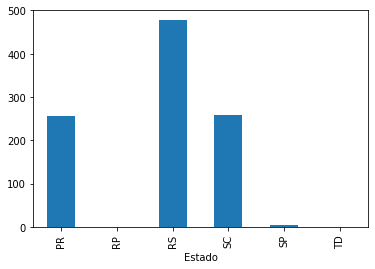

In [120]:
dados.plot.bar()

É possível observar que há várias siglas de estados, pelo número de estados mais presentes, observa-se que o foco da empresa é na região sul. Por causa disso os estados com siglas RP, SP e TD estão fora do padrão.

O segundo atributo categórico a ser analisado é o Gênero.

In [132]:
dados = dataset.groupby(["Genero"]).size()
dados

Genero
Feminino     463
Masculino    535
dtype: int64

<AxesSubplot:xlabel='Genero'>

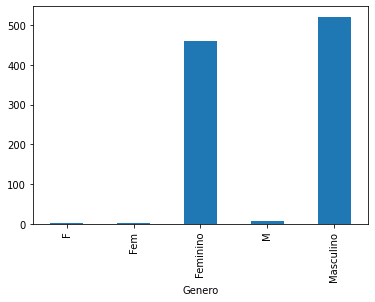

In [122]:
dados.plot.bar()

Nesse caso apesar de apresentar alguns dados fora do padrão, esses dados não estão errados, o domínio está correto, provavelmente isso se deve ao fato de terem sido adiquiridos de formas diferentes.

Agora, com dados númericos a abordagem é um pouco diferente, começando pelo Score utiliza-se o método `describe` para já mostrar algumas análises estatísticas.

In [123]:
dataset["Score"].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

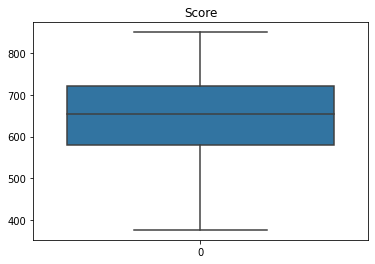

In [124]:
sns.boxplot(data=dataset["Score"]).set_title("Score")

A média (`mean`) é 648, a mediana é dada pelo percentil de 50%, observa-se que a mediana e a média estão próximas, indicando que não existem grandes outliers, o método `describe` ainda mostra os valores mínimo e máximo e pelo número da contagem de dados, 999, indica que não há valores faltantes, logo o Score está sem problemas. O boxplot mostra reprentação dessa análise em forma gráfica.

Text(0.5, 1.0, 'Score')

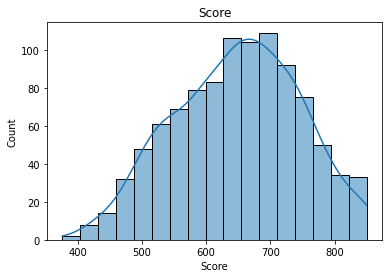

In [98]:
sns.histplot(data=dataset["Score"], kde=True).set_title("Score")

O histograma dos dados afirma o fato de que o Score não apresenta nenhum problema. Essa "linha" que está em conjunto com o gráfico representa o `kde` que indica uma estimiativa da função de densidade dos dados.

Para a Idade, é realizado o mesmo processo.

In [99]:
dataset["Idade"].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

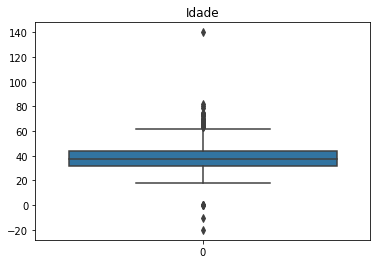

In [100]:
sns.boxplot(data=dataset["Idade"]).set_title("Idade")

Para a idade já foram encontrados alguns problema, um deles é a idade negativa como mencionado anteriormente, o valor min é -20, o que pode ser um erro de digitação, esse tipo de problema pode ser resolvido lá na aquisição de dados, como por exemplo, impedir que o usuário entre com uma idade menor que zero. Como esse erro passou, será tratado na etapa de tratamento.

Outro ponto importante é o valor máximo, de 140, também um valor que provavelmente está incorreto, uma pessoa com 140 anos é impossível de existir atualmente, esse erro também será tratado posteriormente.

Como a média e mediana estão próximos, há indícios de que não existam muitos dados errados para resolver.

Text(0.5, 1.0, 'Idade')

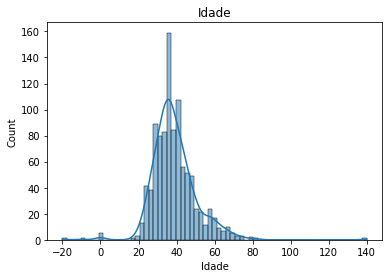

In [101]:
sns.histplot(data=dataset["Idade"], kde=True).set_title("Idade")

O histograma das idades evidencia o fato de terem dados fora do domínio, não só o máximo ou mínimo.

Agora, observa-se o Saldo

In [102]:
dataset["Saldo"].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

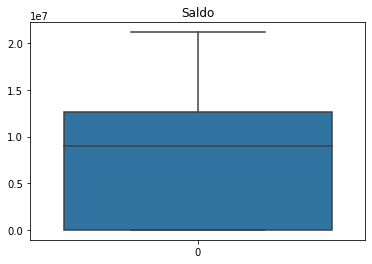

In [103]:
sns.boxplot(data=dataset["Saldo"]).set_title("Saldo")

No saldo já é possível observar uma distribuição maior, variando do 0 até números de 6 a mais dígitos, por isso eles aparem em `notação científica`. O valor mínimo é 0, logo não há saldo negativo, o que não seria errado, pois é possível existir saldo negativo, mas não há nenhum nesse conjunto de dados.

Com o boxplot, é possível observar que a maioria dos dados estão concentrado em valores mais baixos.

Text(0.5, 1.0, 'Saldo')

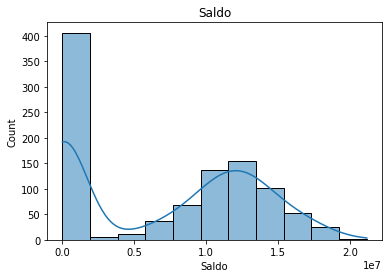

In [104]:
sns.histplot(data=dataset["Saldo"], kde=True).set_title("Saldo")

Pelo histograma os dados mostram distribuídos ao redor da média o que conclui que estão bem distribuídos. Há ainda um pico no 0, a grande maioria dos dados desse atribuito é 0, o que não caracteriza um valor faltante, é 0 mesmo, indica que uma grande parte das pessoas está com a conta zerada, logo não é permitido realizar uma modificação nessa informação, pois ela é válida e está de acordo com as regras de negócio.

Para finalizar, é feito a análise do salário.

In [105]:
dataset["Salario"].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salário')

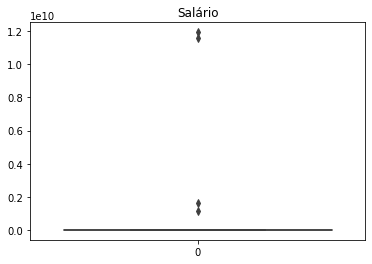

In [106]:
sns.boxplot(data=dataset["Salario"]).set_title("Salário")

O salário apresenta uma peculiaridade semelhante ao saldo, porém muito mais acentuada, há valores muito altos, alto o suficiente para deformar o boxplot, é possível observar o quão fora da visualização estão os outliers, sendo o valor máximo em torno de 10.000.000.000 anuais.

Text(0.5, 1.0, 'Salário')

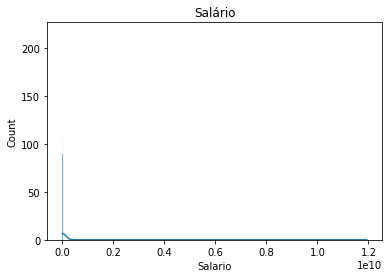

In [107]:
sns.histplot(data=dataset["Salario"], kde=True).set_title("Salário")

Com o histograma é observado o mesmo comportamento, valores muito altos impossibilitam uma boa visualização do gráfico, sendo necessário um tratamento posterior. É possível observar também que há uma concentração de pessoas com em salários próximos de 0, visto pelo `kde`, isso devido ao fato de existir valores discrepantes.


#### Tratamento dos dados

Para realizar o tratamento dos dados primeiro verifica-se a existência de valores Null, NAs ou não existentes. O método apra isso é o `isnull` que verifica se uma valor em um atributo de uma entrada é null, em conjunto com a função de soma, conta-se os valores não existentes.

In [125]:
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

Com isso foram encontrados valores não existentes em 2 colunas, Gênero e Salário. Para os dados numéricos é possível substituir os valores faltantes com a média(`mean`) ou a mediana(`median`), como o salário possui outliers muito claros, utiliza-se a mediana, se os dados estivessem bem distribuídos e sem outiliers, pode-se usar a média.

Para o Gênero que é uma variável categórica, utiliza-se a moda.

O método `fillna` substitui os valores faltantes e o argumento `inplace=True` diz que é para a substituição ocorrer nos próprios dados.

In [126]:
mediana = sts.median(dataset["Salario"])
dataset["Salario"].fillna(mediana, inplace=True)
moda = sts.mode(dataset["Genero"])
dataset["Genero"].fillna(moda, inplace=True)
print("Valores faltantes:")
print(f"Salário: {dataset['Salario'].isnull().sum()}")
print(f"Gênero: {dataset['Genero'].isnull().sum()}")


Valores faltantes:
Salário: 0
Gênero: 0


Os valores faltantes foram completados com sucesso, ambos os atributos não apresentam mais dados faltantes.

O próximo passo é verificar valores duplicados, utilizando o método `duplicated`

In [128]:
dataset[dataset.duplicated(["Id"], keep = False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


Realizando uma busca de valores duplicados pelo Id, observa-se que as entradas 80 e 81 são idênticas. A busca pelo Id é a ideal porque o Id é um atributo identificador, logo é necessário que seu valor seja único. Então usaremos o própio Id para remover as entradas duplicadas, utilizando o método `drop_duplicates`. Os argumentos `subset` indica o atributo e `keep` indica qual entrada manter.

In [129]:
dataset.drop_duplicates(subset="Id", keep="first", inplace=True)
dataset[dataset.duplicated(["Id"], keep = False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


Não encontrando mais entradas duplicadas

Continuando o tratamento de dados, temos que em Gênero, exisita uma falta de padronização dos dados. O método `loc` localiza as entradas onde o argumento é dado como True, onde for True o dado será alterado.

<AxesSubplot:xlabel='Genero'>

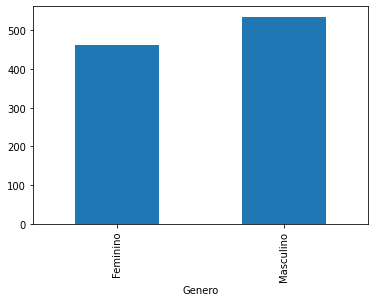

In [131]:
# Verifica se a entrada possui um "M" em gênero, se possuir, substitui o valor da entrada na coluna "Genero" por "Masculino"
dataset.loc[dataset["Genero"] == "M", "Genero"] = "Masculino"

# Verifica se a entrada possui um "F" ou "Fem" em gênero, se possuir, substitui o valor da entrada na coluna "Genero" por "Feminino"
dataset.loc[dataset["Genero"].isin(["Fem", "F"]), "Genero"] = "Feminino"

dados = dataset.groupby(["Genero"]).size()
dados.plot.bar()

Com o histograma, observa-se que não existem mais valores fora do padrão. É possível observar que em se tratando de gênero, não há uma disparidade entre um ou outro, logo os dados recebidos possuem um aparece equilíbrio de gêneros.

A idade é um atributo númerico, então será feita a substituição dos valores fora de domínio pela mediana.

Text(0.5, 1.0, 'Idade')

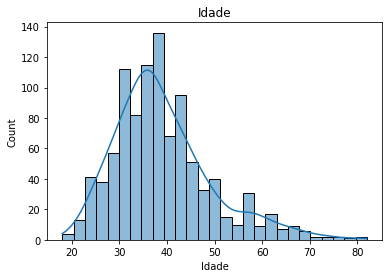

In [113]:
mediana = sts.median(dataset["Idade"])
dataset.loc[(dataset["Idade"] < 18) | (dataset["Idade"] > 100)] = mediana
sns.histplot(data=dataset["Idade"], kde=True).set_title("Idade")

Utilizando o domínio de idade maior que 18 e menor que 100 anos, os dados foram tratados e o gráfico confirma como a distribuição resultande está sem os outliers que foram observados anteriormente. É possível observar que em se tratando de idade a concentração maior está entre os 25 e 50 anos.

O Estado apresentou valores alterados também, RP, SP e TD, como é categórico, esses valores serão substituídos pela moda.

<AxesSubplot:xlabel='Estado'>

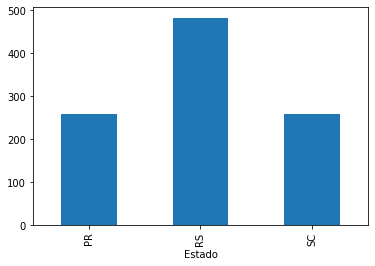

In [134]:
moda = sts.mode(dataset["Estado"])
dataset.loc[dataset["Estado"].isin(["RP", "SP", "TD"]), "Estado"] = moda
dados = dataset.groupby(["Estado"]).size()
dados.plot.bar()

O gráfico confirma o tratamento dos estados, agora não existe nenhum estado que não existe ou fora da região sul. Observa-se que o estado do Rio Grande do Sul apresenta um maior número de clientes.

Para o tratamento do salário, é tratado os outliers. Nesse caso como a base de dados é pequena, será removido os outliers que estiverem fora de 2 desvios padrão dos dados, o que equivale a manter 95% dos valores presentes.

O método `stdev` do pacote `statistics` calcula o desvio padrão.

Text(0.5, 1.0, 'Salário')

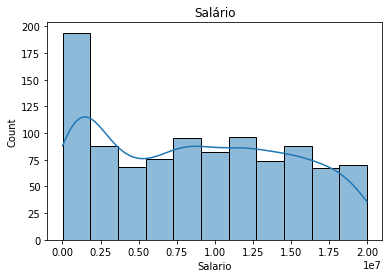

In [135]:
desvio = sts.stdev(dataset["Salario"])
mediana = sts.median(dataset["Salario"])
dataset.loc[dataset["Salario"] >= 2 * desvio, "Salario"] = mediana
sns.histplot(data=dataset["Salario"], kde=True).set_title("Salário")

Agora é possível observar a distribuição dos salários de uma forma bem melhor do que a que estava com os outliers. Pelo novo gráfico confirma-se que a uma boa parte dos salários estão concentrados a valores baixos, podendo também refletir a realidade, onde uma parcela considerável de pessoas estão concentradas nos valores mais baixos de salários.

Terminando assim o tratamento de dados, observando o resumo do dataest, utilizando o método `describe`

In [136]:
dataset.describe()

,Id,Score,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
count,998.000000,998.000000,998.000000,998.000000,9.980000e+02,998.000000,998.000000,998.00000,9.980000e+02,998.000000
mean,501.337675,648.605210,38.907816,5.073146,7.162423e+06,1.526052,0.703407,0.51002,8.782277e+06,0.203407
std,288.500953,98.312117,11.406570,2.926320,6.314508e+06,0.574293,0.456985,0.50015,6.066205e+06,0.402734
min,1.000000,376.000000,-20.000000,0.000000,0.000000e+00,1.000000,0.000000,0.00000,9.677000e+03,0.000000
25%,252.250000,580.000000,32.000000,2.000000,0.000000e+00,1.000000,0.000000,0.00000,2.849010e+06,0.000000
50%,501.500000,653.000000,37.000000,5.000000,8.926348e+06,1.000000,1.000000,1.00000,8.635279e+06,0.000000
75%,750.750000,721.000000,44.000000,8.000000,1.258767e+07,2.000000,1.000000,1.00000,1.391447e+07,0.000000
max,1000.000000,850.000000,140.000000,10.000000,2.117743e+07,4.000000,1.000000,1.00000,1.997254e+07,1.000000
